In [4]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import os
import pickle
import math
import pdb; 

warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 200)

from keras.models import Model, Sequential, load_model
from keras.layers import Dense, Input, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.datasets import mnist
from keras.optimizers import Adam
from keras.preprocessing import image

from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks  import EarlyStopping
from keras import backend as K
from keras import activations
#from vis.utils import utils
#from vis.visualization import get_num_filters
#from vis.input_modifiers import Jitter

from keras import activations


from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.preprocessing.image import image
from keras.models import load_model

from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input as inceptionv3_preprocessor_input
from keras.applications.inception_v3 import decode_predictions as inceptionv3_decode_predictions

from keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input as vgg16_preprocessor_input
from keras.applications.vgg16 import decode_predictions as vgg16_decode_predictions

from keras.applications import VGG19
from keras.applications.vgg19 import preprocess_input as vgg19_preprocessor_input
from keras.applications.vgg19 import decode_predictions as vgg19_decode_predictions

from keras.applications import ResNet50
from keras.applications.resnet50 import preprocess_input as resnet50_preprocessor_input
from keras.applications.resnet50 import decode_predictions as resnet50_decode_predictions

from keras.applications import densenet
from keras.applications.densenet import DenseNet201, DenseNet121
from keras.applications.densenet import preprocess_input as densenet_preprocessor_input
from keras.applications.densenet import decode_predictions as densenet_decode_predictions


import numpy as np


global model

global modelvgg16
global modelvgg19
global modelinceptionv3
global modelresnet50
global modeldensenet

global input_width
global input_height

def showlayer(layeroutput):
    w=10
    h=10
    
    w = layeroutput.shape[1]
    h = layeroutput.shape[2]
    count =  layeroutput.shape[3]
    print (count)
    fig=plt.figure(figsize=(w, h))
    columns = int( math.sqrt(count))
    rows = int(math.sqrt(count)) 
    print (columns , rows)
    for i in range(1, columns*rows +1 ):
        #img = np.random.randint(10, size=(h,w))
        fig.add_subplot(rows, columns, i)
        plt.axis('off')
        plt.imshow(layeroutput[0,:,:, i-1], cmap='gray')
    plt.show(block=False)
    
    
img_path = '/home/arshad/horse.jpg'


img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)

img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
print(img_tensor.shape)
#plt.imshow(img_tensor[0])
#plt.axis('off')
#plt.show()

def vgg():
    vgg = VGG16(weights='imagenet', include_top=False);
    layer_outputs = [layer.output for layer in vgg.layers if 'conv1' in layer.name]
    for layer in vgg.layers:
        print (layer.name)
    
    activation_model = Model(inputs=vgg.input, outputs=layer_outputs)
    intermediate_activations = activation_model.predict(img_tensor)
    first_layer_activation = intermediate_activations[0]

    for layerll in intermediate_activations:
        showlayer(layerll)

    
def switchvgg16():
    global model
    global modelvgg16
    global input_width
    global input_height
    input_width = 224
    input_height = 224
    model = modelvgg16
     
def switchvgg19():
    global model
    global modelvgg19
    global input_width
    global input_height
    input_width = 224
    input_height = 224
    model = modelvgg19
     
    
def switchinceptionv3():
    global model
    global modelinceptionv3
    global input_width
    global input_height
    input_width = 299
    input_height = 299
    model = modelinceptionv3
    
def switchresnet50():
    global model
    global modelresnet50
    global input_width
    global input_height
    input_width = 224
    input_height = 224
    model = modelresnet50   
    
def switchdensenet():
    global model
    global modeldensenet
    global input_width
    global input_height
    input_width = 224
    input_height = 224
    model = modeldensenet 
    
def loadinceptionv3():
    global modelinceptionv3
    print ("Loading Inception ... ")
    modelinceptionv3 = InceptionV3(weights='imagenet')
    print ("Model loaded")
    switchinceptionv3()
    

    
def loadresnet50():
    global modelresnet50
    print ("Loading Resnet50 ... ")
    modelresnet50 = ResNet50(weights='imagenet')
    print ("Model loaded")
    switchresnet50()
    
def loadvgg16():
    global modelvgg16   
    print ("Loading VGG16 ... ")
    modelvgg16 =  VGG16(weights='imagenet')
    print ("Model loaded")
    switchvgg16()

def loadvgg19():
    global modelvgg19 
    print ("Loading VGG19 ... ")
    modelvgg19 =  VGG19(weights='imagenet')
    print ("Model loaded")
    switchvgg19()
    
def loaddensenet():
    global modeldensenet 
    print ("Loading  Densenet... ")
    modeldensenet =  DenseNet121(weights='imagenet')
    print ("Model loaded")
    switchdensenet()
    
def doinference(path):
    global model
    img_path = path
    img = image.load_img(img_path, target_size=(input_width, input_height))
    x = image.img_to_array(img)
    x = x.reshape((1, x.shape[0], x.shape[1], x.shape[2]))
    #x = np.expand_dims(x, axis=0)
    
    if model.name == 'vgg16' :
        x = vgg16_preprocessor_input(x)
    elif model.name == 'vgg19' :
        x = vgg19_preprocessor_input(x)
    elif model.name == 'inception_v3' :
        x = inceptionv3_preprocessor_input(x)
    elif model.name == 'resnet50' :
        x = resnet50_preprocessor_input(x)
    else:
        x = inceptionv3_preprocessor_input(x)
        
    #x = preprocess_input(x)
 

    preds = model.predict(x)
    
    if model.name == 'vgg16' :
       print('Predicted:',  vgg16_decode_predictions(preds))
    elif model.name == 'vgg19' :
       print('Predicted:',  vgg19_decode_predictions(preds))
    elif model.name == 'inception_v3' :
       print('Predicted:',  inceptionv3_decode_predictions(preds))
    elif model.name == 'resnet50' :
       print('Predicted:',  resnet50_decode_predictions(preds)) 
    else:
       print('Predicted:',  inceptionv3_decode_predictions(preds)) 

def vggpredict():
    model = VGG16(weights='imagenet')
    #model = keras.models.load_model("/home/arshad/.keras/models/inception_v3_weights_tf_dim_ordering_tf_kernels.h5")
    img_path = '/home/arshad/zebra.jpg'
    img = image.load_img(img_path, target_size=(299, 299))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    preds = model.predict(x)
    print('Predicted:', decode_predictions(preds))

def inception():
    model = InceptionV3(weights='imagenet')
    #model = keras.models.load_model("/home/arshad/.keras/models/inception_v3_weights_tf_dim_ordering_tf_kernels.h5")
    img_path = '/home/arshad/zebra.jpg'
    img = image.load_img(img_path, target_size=(299, 299))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    preds = model.predict(x)
    print('Predicted:', decode_predictions(preds))

#loadvgg16()
#loadinceptionv3()
#loadresnet50()
#doinference('/home/arshad/mugbk.jpg')
#pdb.set_trace() #drop to python shell
#plt.style.use('ggplot')
#plt.imshow(img_tensor[0])
#plt.axis('off')
#plt.show()

    
#print "hello"

Using TensorFlow backend.


(1, 150, 150, 3)


In [ ]:

#loadinceptionv3()
switchdensenet()
#switchinceptionv3()
doinference('/home/arshad/mugbk.jpg')
#pdb.set_trace() #drop to python shell
#plt.style.use('ggplot')
#plt.imshow(img_tensor[0])
#plt.axis('off')
#plt.show()

    
#print "hello"

In [12]:
def showlayer(layeroutput):
    w=10
    h=10
    
    w = layeroutput.shape[1]
    h = layeroutput.shape[2]
    features =  layeroutput.shape[3]
    print (features)
    fig=plt.figure(figsize=(w, h))
    columns = features / 2; #int( math.sqrt(features))
    rows = features / 2; #int(math.sqrt(count)) 
    print (columns , rows)
    for i in range(1, features ):
        #img = np.random.randint(10, size=(h,w))
        fig.add_subplot(rows, columns, i)
        plt.axis('off')
        plt.imshow(layeroutput[0,:,:, i-1], cmap='gray')
    plt.show(block=False)
    
    
img_path = '/home/arshad/horse.jpg'


img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)

img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
img_tensor.shape[1]
#showlayer(img_tensor)
#print(img_tensor.shape)

#plt.imshow(img_tensor[0])
#plt.axis('off')
#plt.show()


150

In [18]:
# plot feature map of first conv layer for given image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.applications import densenet
from keras.applications.densenet import DenseNet201, DenseNet121
from keras.applications.densenet import preprocess_input as densenet_preprocessor_input
from keras.applications.densenet import decode_predictions as densenet_decode_predictions


from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims
vgg16model = VGG16(weights='imagenet')
densemodel = DenseNet121(weights='imagenet')


(1, 56, 56, 96)


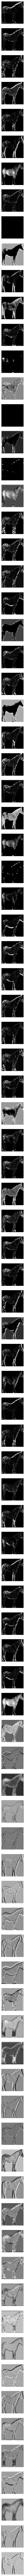

In [25]:
# redefine model to output right after the first hidden layer
model = Model(inputs=densemodel.inputs, outputs=densemodel.layers[13].output)
#model.summary()
# load the image with the required shape
img = load_img('/home/arshad/horse.jpg', target_size=(224, 224))
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)
# get feature map for first hidden layer
feature_maps = model.predict(img)
width = feature_maps.shape[1]
height = feature_maps.shape[2]
features = feature_maps.shape[3]
# plot all 64 maps in an 8x8 squares
square = 2
ix = 1
dpi =  pyplot.rcParams['figure.dpi']
figsize = width, height
print(feature_maps.shape)
figsize=230,230
fig, ax = pyplot.subplots(features, 1, figsize=figsize)
for i in range(0,features):
    # specify subplot and turn of axis
    ax[i].axis('off')
    ax[i].imshow(feature_maps[0, :, :, ix-1],   cmap='gray')
    ix += 1
# show the figure
pyplot.show()